In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import seaborn as sns
data = pd.read_csv('Data_mining/Data/set_data.csv')


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import time

X = data[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack','PhysActivity',
          'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age']]
y = data['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
start_time_cv = time.time()
cv_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
end_time_cv = time.time()

start_time_train = time.time()
model.fit(X_train, y_train)
end_time_train = time.time()

start_time_predict = time.time()
y_pred = model.predict(X_test)
end_time_predict = time.time()

mse = mean_squared_error(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
print("Cross-Validation Skorları:", cv_scores)
print("Ortalama Skor:", cv_scores.mean())
print("Cross-Validation Süresi:", end_time_cv - start_time_cv, "saniye")
print("Eğitim Süresi:", end_time_train - start_time_train, "saniye")
print("Tahmin Süresi:", end_time_predict - start_time_predict, "saniye")
print("MSE:", mse)

Cross-Validation Skorları: [0.73606789 0.72574257 0.74692319 0.74621587 0.73348423 0.73376715
 0.75244023 0.75385486 0.7392842  0.74055736]
Ortalama Skor: 0.7408337556872717
Cross-Validation Süresi: 11.170048475265503 saniye
Eğitim Süresi: 0.6314196586608887 saniye
Tahmin Süresi: 0.0028662681579589844 saniye
MSE: 0.25723177028078364


In [ ]:
customer_data = pd.DataFrame({
    'HighBP': [0.0],
    'HighChol': [0.0],
    'CholCheck': [1.0],
    'BMI': [26.0],
    'Smoker': [0.0],
    'Stroke': [0.0],
    'HeartDiseaseorAttack': [0.0],
    'PhysActivity': [1.0],
    'Fruits': [1.0],
    'Veggies': [1.0],
    'HvyAlcoholConsump': [0.0],
    'GenHlth': [2.0],
    'MentHlth': [0.0],
    'PhysHlth': [0.0],
    'DiffWalk': [0.0],
    'Sex': [1.0],
    'Age': [9.0]
})

start_time_predict_new_data = time.time()
predicted_diabetes = model.predict(customer_data)
end_time_predict_new_data = time.time()

print("Tahmini Diabetes Binary:", predicted_diabetes)
print("Yeni Veri Tahmin Süresi:", end_time_predict_new_data - start_time_predict_new_data, "saniye")

Tahmini Diabetes Binary: [0.]
Yeni Veri Tahmin Süresi: 0.00177001953125 saniye


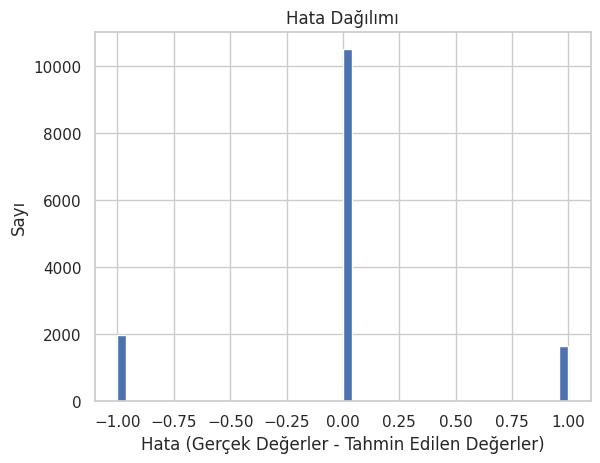

In [ ]:
plt.hist(y_test - y_pred, bins=50)
plt.xlabel("Hata (Gerçek Değerler - Tahmin Edilen Değerler)")
plt.ylabel("Sayı")
plt.title("Hata Dağılımı")
plt.show()